# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

### 1. Чтение таблицы

In [2]:
hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=";")
hh_data.shape

(44744, 12)

### 2. Проверка таблицы

In [3]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


### 3. Информация о числе непустых значений и типах

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

### 4. Статистическая информация

In [5]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

### 1. Уровень образования

In [6]:
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: x.split(' ')[0] if x.split(' ')[1] == 'образование' else \
                                                           x.split(' ')[0] + ' ' + x.split(' ')[1])
hh_data.drop('Образование и ВУЗ', axis=1, inplace=True)
hh_data[hh_data['Образование'] == 'Среднее'].shape[0]

559

### 2. Пол и возраст

In [7]:
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: 'М' if x.split(' ')[0] == "Мужчина" else "Ж")
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(x.split(' ')[3]))

print((hh_data['Пол'].value_counts(normalize=True) * 100).round(2))
print("-" * 20)
print((hh_data['Возраст'].mean()).round(1))

hh_data.drop('Пол, возраст', axis=1, inplace=True)

М    80.93
Ж    19.07
Name: Пол, dtype: float64
--------------------
32.2


### 3. Опыт работы

In [8]:
def work_experience(experience):
    if experience is np.nan or experience == 'Не указано':
        return np.nan
    else:
        experience_split = experience.split(' ')  
    year_words = ['год', 'года', 'лет']
    month_words = ['месяц', 'месяца', 'месяцев']
    months_experience = 0
    for i in range(len(experience_split[:6])):
        if experience_split[i] in year_words:
            months_experience += int(experience_split[i-1]) * 12
        if experience_split[i] in month_words:
            months_experience += int(experience_split[i-1])
    return int(months_experience)

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(work_experience)
print(hh_data['Опыт работы (месяц)'].median())
hh_data.drop('Опыт работы',axis=1, inplace=True)

100.0


### 4. Город

In [9]:
def city_transormation(data):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', \
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    city = data.split(' ')[0]
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    elif city in million_cities:
        return 'Город-миллионник'
    else:
        return 'Другие'

def business_trip_transformation(data):
    examples_list = [', готов к командировкам', ', готова к командировкам', ', готов к редким командировкам', ', готова к редким командировкам']
    for i in examples_list:
        if i in data:
            return True
    return False
    
    
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(city_transormation)

hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(lambda x: False if 'не готов к переезду' in x \
                                                                                or 'не готова к переезду' in x else True)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(business_trip_transformation)
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

print(round(hh_data['Город'].value_counts(normalize=True) * 100))
print()
mask = (hh_data['Готовность к переезду'] == True) & (hh_data['Готовность к командировкам'] == True)
print(round(hh_data[mask].shape[0] / hh_data.shape[0] * 100))

Москва              37.0
Другие              37.0
Город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

32


### 5. Занятость и график

In [10]:
schedule_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

for i in schedule_list:
    hh_data[i] = hh_data['График'].apply(lambda x: True if i in x else False)
for i in employment_list:
    hh_data[i] = hh_data['Занятость'].apply(lambda x: True if i in x else False)
    
mask = (hh_data['проектная работа'] == True) & (hh_data['волонтерство'] == True)
print(hh_data[mask].shape[0])
mask = (hh_data['вахтовый метод'] == True) & (hh_data['гибкий график'] == True)
print(hh_data[mask].shape[0])

hh_data.drop(['Занятость', 'График'], axis=1, inplace=True)

436
2311


### 6. Валюты

In [11]:
exchange_data = pd.read_csv('ExchangeRates.csv', usecols=['currency', 'date', 'proportion', 'close'])

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
exchange_data['date'] = pd.to_datetime(exchange_data['date'], dayfirst=True)
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])

hh_data['Наименование валюты'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[1])
hh_data['ЗП'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[0]).astype('int64') 
hh_data['Наименование валюты'] = hh_data['Наименование валюты'].replace({'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'})

hh_data = hh_data.merge(exchange_data, how='left', left_on=['Обновление резюме', 'Наименование валюты'], right_on=['date', 'currency'])
hh_data['close'].fillna(1, inplace=True)
hh_data['proportion'].fillna(1, inplace=True)
hh_data['ЗП (руб)'] = hh_data['ЗП'] * hh_data['close'] / hh_data['proportion']

hh_data.drop(['ЗП', 'Наименование валюты', 'currency', 'date', 'close', 'proportion'], axis=1, inplace=True)

hh_data['ЗП (руб)'].median()

59019.0

# Исследование зависимостей в данных

### 1.

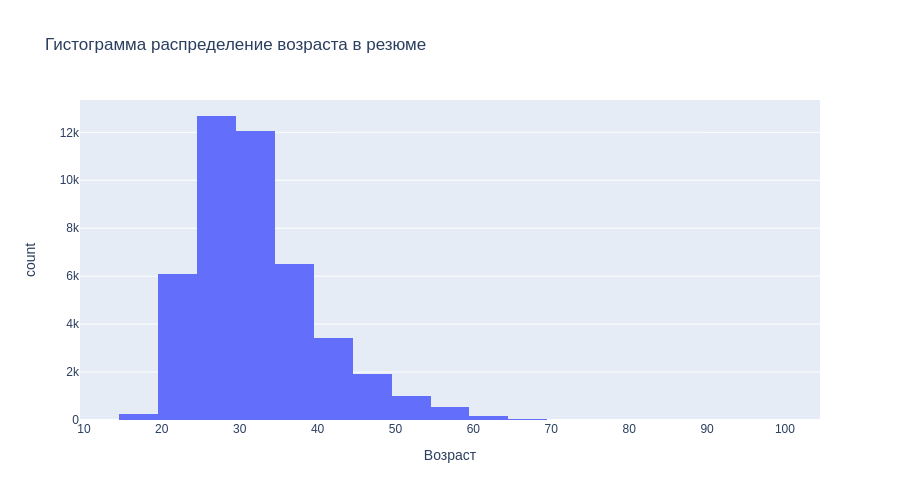

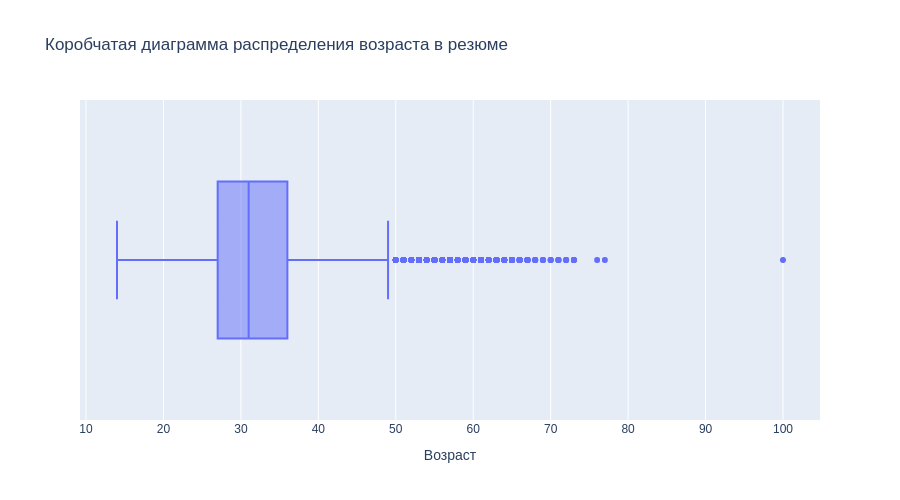

In [12]:
fig = px.histogram(
    hh_data,
    x='Возраст',
    title='Гистограмма распределение возраста в резюме',
    nbins=25,
    height=500,
    width=900)
fig.show('png')
#fig.write_html('plotly/1hist.html')

fig = px.box(
    hh_data,
    x='Возраст',
    title='Коробчатая диаграмма распределения возраста в резюме',
    height=500,
    width=900)
fig.show('png')
#fig.write_html('plotly/1box.html')

Распределение возраста похоже на лог-нормальное. Наибольшее количество соискателей в возрасте от 25 до 34 лет. Присутсвует выброс, который равен ста годам. Предельные значения начинаются от 50 лет. При повышении возраста идет плавное снижение количества соискателей, тогда как при снижении возраста идет резкий спад.

### 2.

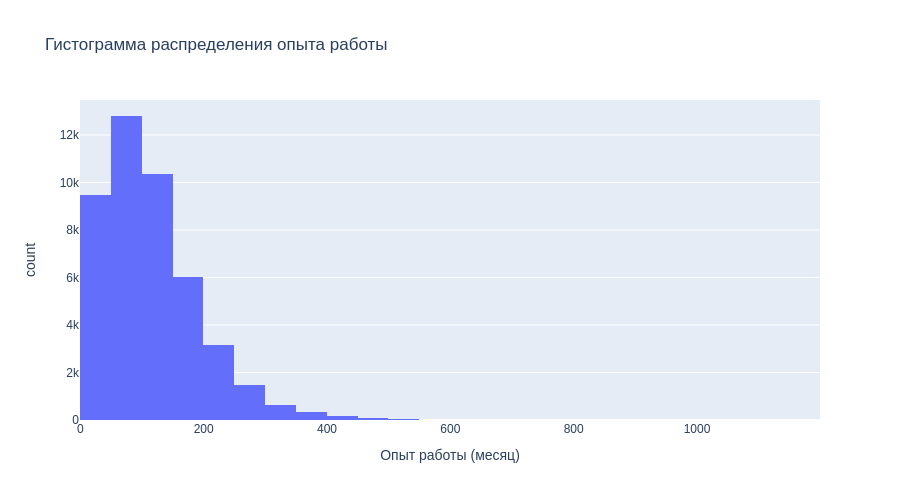

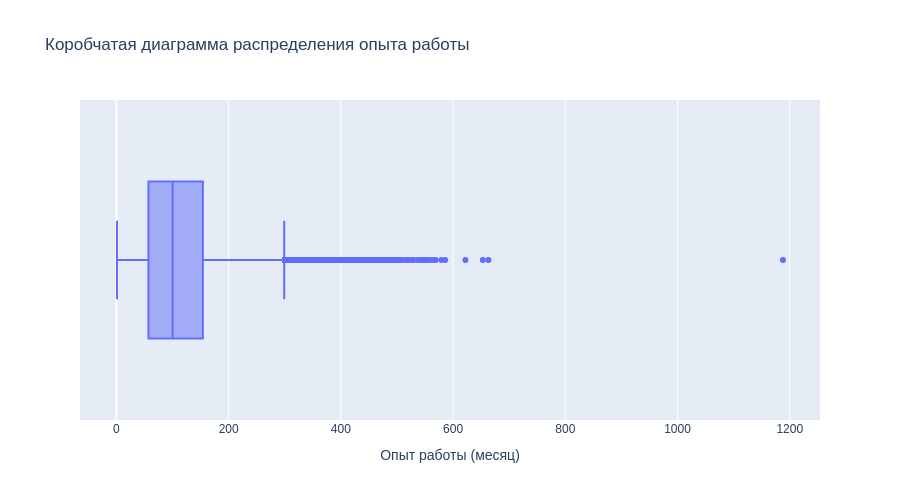

In [13]:
fig = px.histogram(
    hh_data,
    x='Опыт работы (месяц)',
    nbins=25,
    title='Гистограмма распределения опыта работы',
    height=500,
    width=900)
fig.show('png')
#fig.write_html('plotly/2hist.html')


fig = px.box(
    hh_data,
    x='Опыт работы (месяц)',
    title='Коробчатая диаграмма распределения опыта работы',
    height=500,
    width=900)
fig.show('png')
#fig.write_html('plotly/2box.html')

Распределение опыта работы, также лог-нормальное. Наибольшее количество соискателей имеет опыт работы 50-99 месяцев (4-8 лет). Присутствует выброс, который равен 1188 месяцам. Предельные значения начинаются с трехсотого месяца (25 лет). Около 33 тысяч соискателей имеют опыт в районе 0-149 месяцев (0-12.5 лет).

### 3.

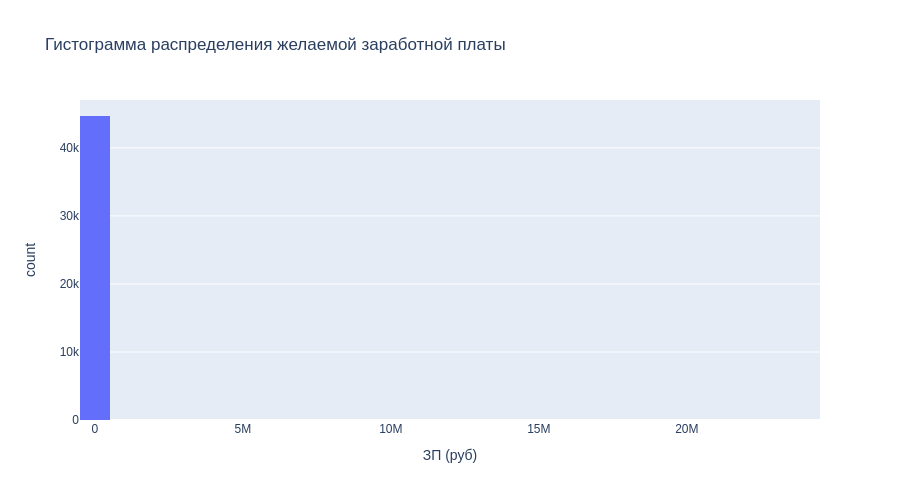

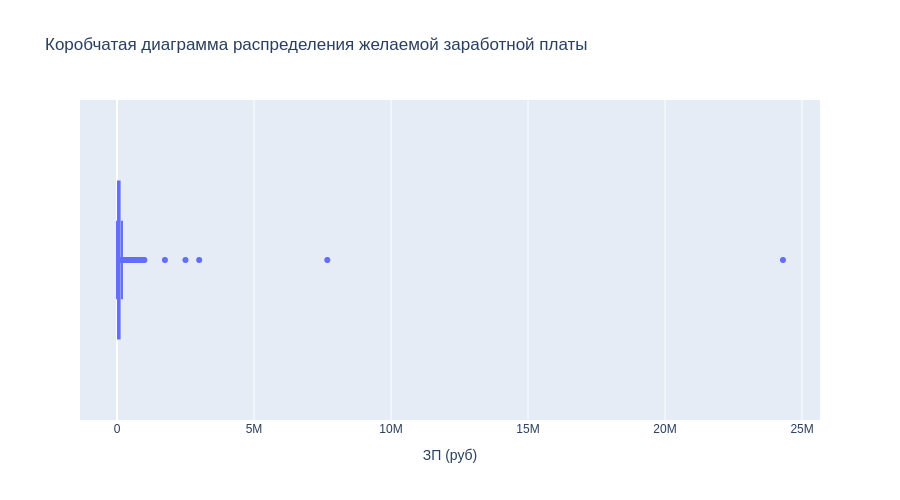

In [14]:
fig = px.histogram(
    hh_data,
    x='ЗП (руб)',
    nbins=25,
    height=500,
    width=900,
    title='Гистограмма распределения желаемой заработной платы')
fig.show('png')
#fig.write_html('plotly/3hist.html')

fig = px.box(
    hh_data,
    x='ЗП (руб)',
    height=500,
    width=900,
    title='Коробчатая диаграмма распределения желаемой заработной платы')
fig.show('png')
#fig.write_html('plotly/3box.html')

Отталкиваясь от гистограммы, можно сказать, что присутсвует отрицательное значение. Медиана равняется 59 тысячам, границы размаха от 37 до 95 тысяч. Предельные значения начинаются со 182 тысяч. Есть потенциальные выбросы близлежащие к нулевому значению и к ним можно еще отнести значения от 500 тысяч до миллиона рублей, они требуют допольнительного исследования. Также есть несомненные выбросы, которые находятся в интервале от миллиона рублей до 25 миллионов.

### 4.

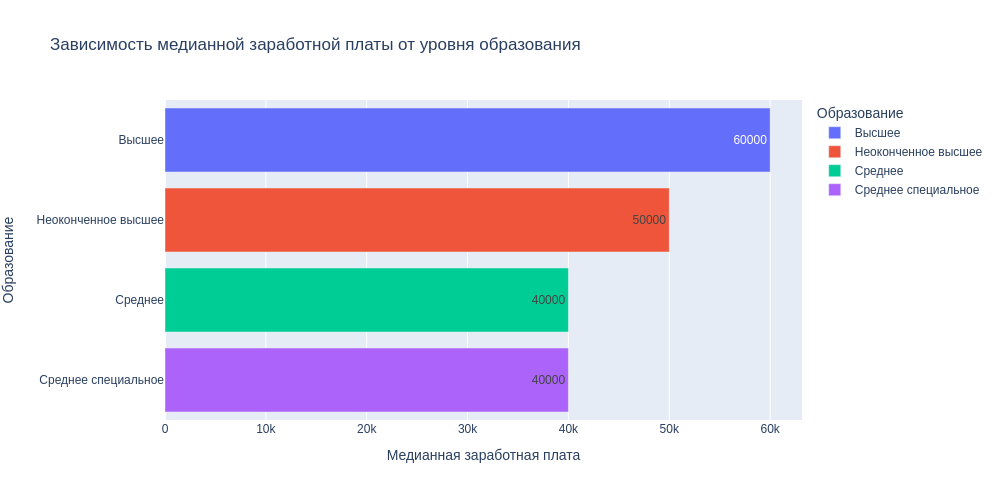

In [15]:
df_bar = hh_data[hh_data['ЗП (руб)'] < 1_000_000].groupby('Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    df_bar,
    color='Образование',
    y='Образование',
    title='Зависимость медианной заработной платы от уровня образования',
    x='ЗП (руб)',
    height=500,
    width=1000,
    text='ЗП (руб)').update_layout(xaxis_title='Медианная заработная плата')
fig.show('png')
#fig.write_html('plotly/4bar.html')

На графике видна зависимость, чем выше уровень образования, тем выше желаемая зарплата. Для групп соискателей со средним и средним специальным образованием наблюдаются равные значения (40 тыс.). Образование является важным признаком при прогнозировании желаемой заработной платы.

### 5.

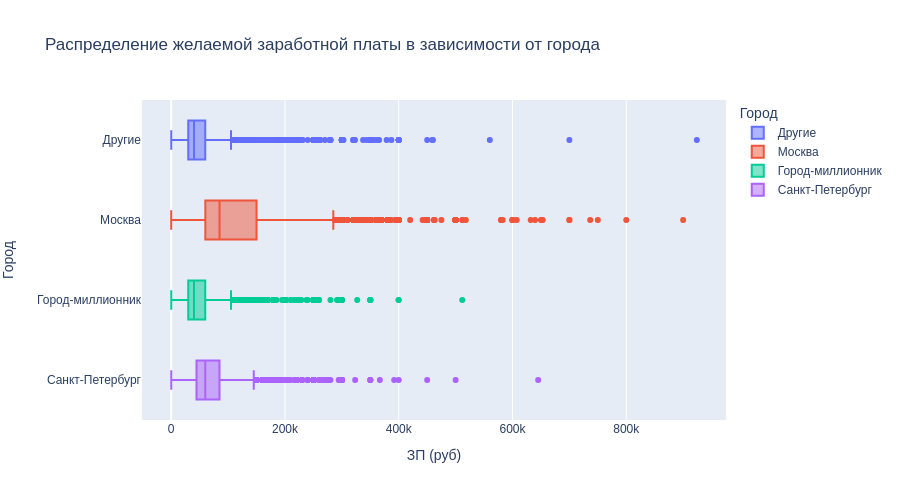

In [16]:
df_box = hh_data[hh_data['ЗП (руб)'] < 1_000_000]

fig = px.box(
    df_box,
    x='ЗП (руб)',
    y='Город',
    color='Город',
    height=500,
    width=900,
    title='Распределение желаемой заработной платы в зависимости от города')
fig.show('png')
#fig.write_html('plotly/5box.html')

Для категорий "другие" и "город-миллионник", наблюдаются схожие характеристики. Равное медианное значние (40 тыс.), также равны 25, 75 квантили (30-60 тыс.) и верхние границы (105 тыс.). Но при этом в категории "другие" значительно больше выбросов. В Санкт-Петербурге медианная зарплата выше на 20 тысяч рублей, по сравнению с прошлыми категориями (60 тыс.), также больше размах (45-85 тыс) и верхняя граница (145 тыс.). В Москве наибольший показатель медианной желаемой зарплаты (85 тыс.), также самый большой размах (60-150 тыс.) и верхняя граница (285 тыс.). Можно заметить, что с увеличением медианной зарплаты, увеличивается размах и верхняя граница. Этот признак также очень важен при прогнозировании, особенно если соискатели проживают в Москве или Санкт-Петербурге. Так как между ними очень огромная разница в показателях распределения.

### 6.

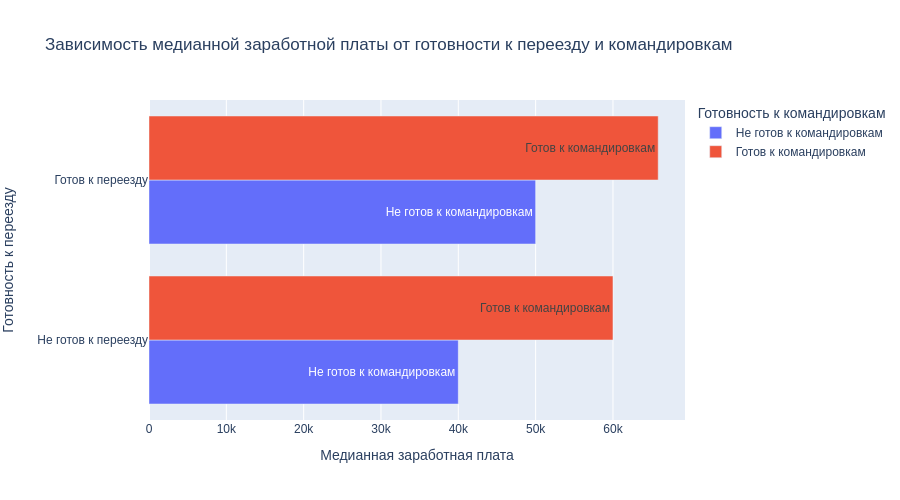

In [17]:
df_bar = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
df_bar['Готовность к переезду'] = df_bar['Готовность к переезду'].apply(lambda x: 'Готов к переезду' if x is True else 'Не готов к переезду')
df_bar['Готовность к командировкам'] = df_bar['Готовность к командировкам'].apply(lambda x: 'Готов к командировкам' if x is True else 'Не готов к командировкам')

fig = px.bar(
    df_bar,
    y='Готовность к переезду',
    x='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',
    text='Готовность к командировкам',
    height=500,
    width=900,
    title='Зависимость медианной заработной платы от готовности к переезду и командировкам').update_layout(xaxis_title='Медианная заработная плата')
fig.show('png')
#fig.write_html('plotly/6bar.html')

Для соискателей, которые готовы к переезду и командировкам, медианное значение ЗП равняется 65 тысячам. А те, кто не готов перемещаться, просят на 25 тысяч меньше зарплату. Также можно заметить как признак готовности к командировкам поднимает медианную ЗП, на целых 20-25 тысяч, в зависимости готов ли человек на переезд. Переезд не так сильно влияет на этот показатель, всего лишь разница 10 тысяч, между теми кто готов на переезд, а кто нет. Можно сделать вывод, что чем больше человек согласен на перемещения по работе, тем больше он будет просить зарплату.

### 7.

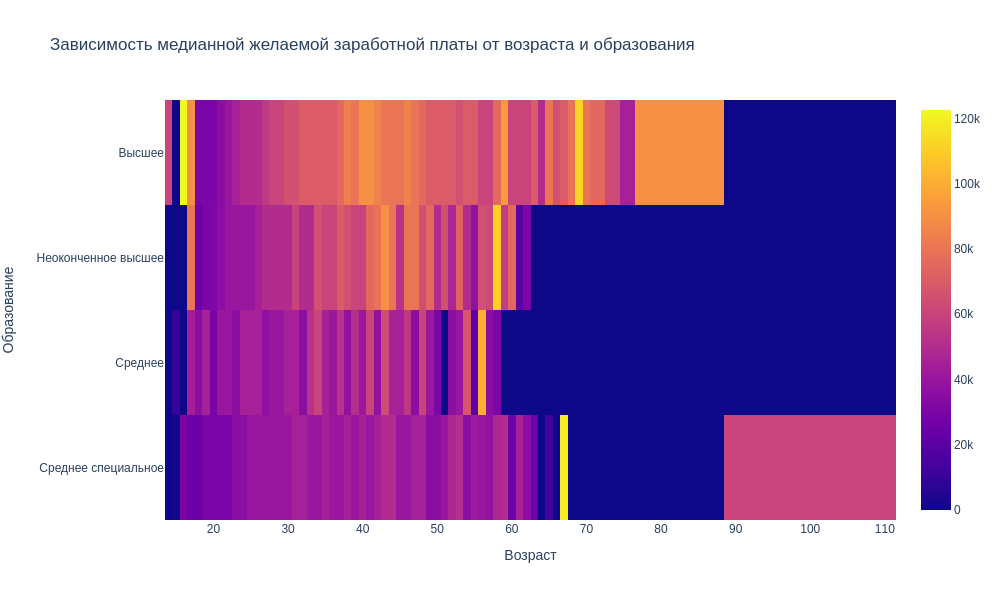

In [18]:
imshow_df = pd.pivot_table(hh_data, values='ЗП (руб)', columns='Возраст', index='Образование', aggfunc='median')
imshow_df.fillna(0, inplace=True)

fig = px.imshow(
    imshow_df,
    title='Зависимость медианной желаемой заработной платы от возраста и образования',
    width=1000,
    height=600)
fig.show('png')
#fig.write_html('plotly/7heatmap.html')

Самый быстрый карьерный рост идет у соискателей с высшим образованием, после них с небольшим отставанием идут люди с неоконченным высшим, у обоих этих групп заметен плавный рост с постепенным увеличением желаемой зарплаты. Также есть потенциальные выбросы в категории с высшим образованием, например соискатели с возрастом от 14 до 20 никак бы не смогли окончить ВУЗ. У группы соискателей со средним образованием тепловая карта окрашена хаотично, зависимости нет и зарплаты ниже, чем в предыдущих категориях. А самый медленный карьерный рост у людей со средним специальным, тут также идет плавный рост, но желаемые зарплаты не поднимаются выше 60 тысяч, не считая потенциального выброса в виде 120 тысяч и аномалии в виде 100 лет.

### 8.

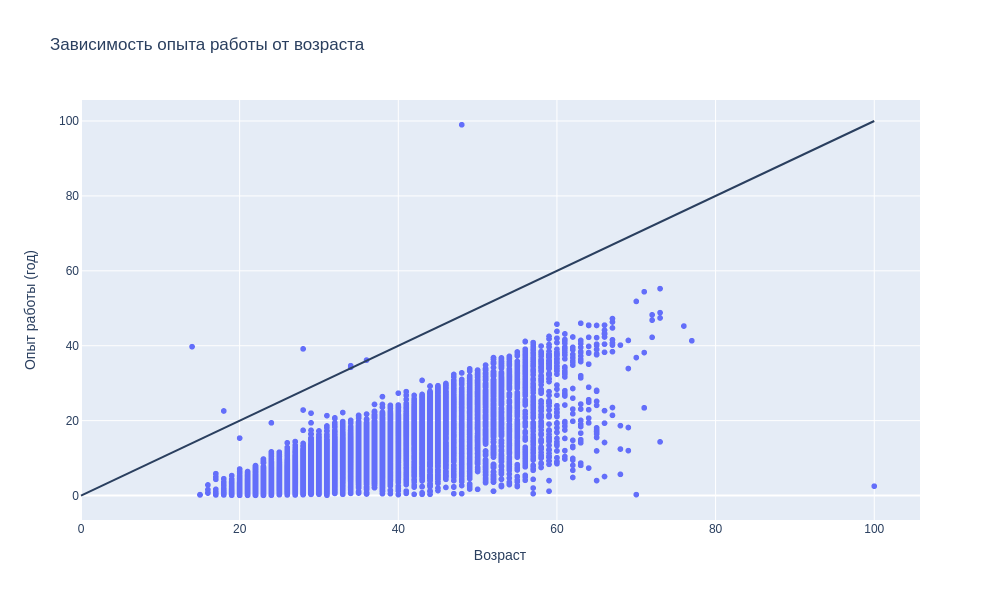

In [19]:
scatter_df = hh_data.copy()
scatter_df['Опыт работы (год)'] = scatter_df['Опыт работы (месяц)'] / 12

fig = px.scatter(
    scatter_df,
    x='Возраст',
    y='Опыт работы (год)',
    width=1000,
    height=600,
    title='Зависимость опыта работы от возраста')

fig.add_shape(x0=0, x1=100, y0=0, y1=100, type='line')
fig.show('png')
#fig.write_html('plotly/8scatter.html')

Линия предназначена для поиска выбросов. Она проходит по той траектории, когда возраст равен опыту работы человека и все что находится выше ее это выброс. Можно насчитать 7 выбросов. Плотность распределения растет с увеличением опыта работы. После 55 лет плотность постепенно рассеивается. Больше каких либо зависимостей трудно найти.

### 9.


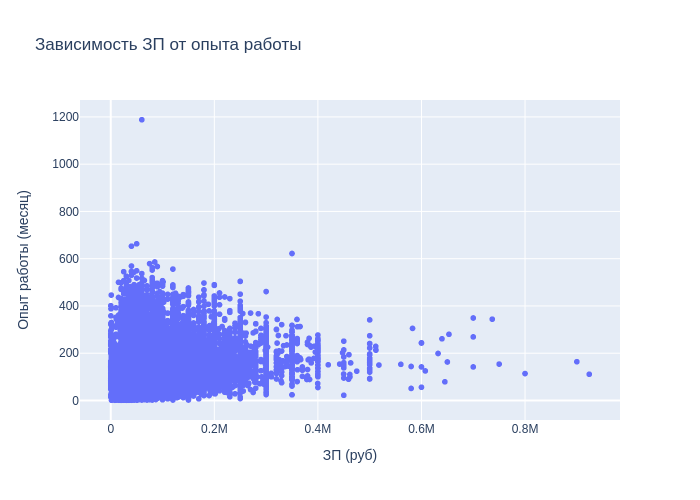

In [20]:
scat_df = hh_data[hh_data['ЗП (руб)'] < 1_000_000]
fig = px.scatter(
    scat_df,
    x='ЗП (руб)',
    y='Опыт работы (месяц)',
    title='Зависимость ЗП от опыта работы')
fig.show('png')
#fig.write_html('plotly/9scatter.html')

Можно заметить большое количество точек близлежащих нуля. Наибольшая плотность находится в интервале 20-100 тысяч, далее идет ее снижение. Судя по графику, тут взаимосвязей не наблюдается и опыт работы никак не влияет на желаемую зарплату.

### 10.

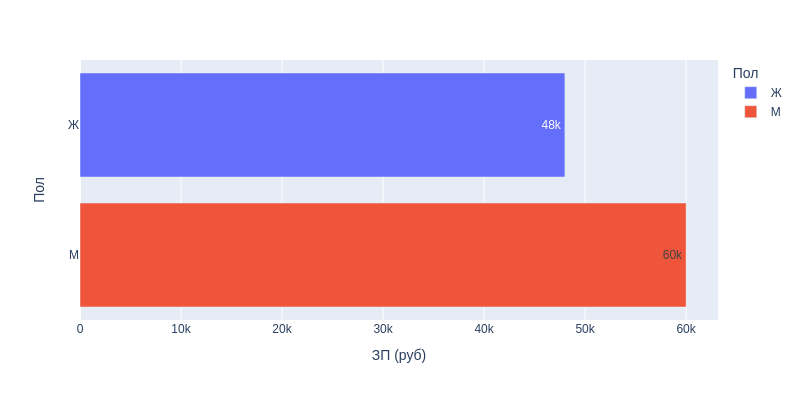

In [21]:
bar_df = hh_data.groupby('Пол', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    bar_df,
    x='ЗП (руб)',
    y='Пол',
    color='Пол',
    width=800,
    height=400,
    text_auto=True)
fig.show('png')
#fig.write_html('plotly/10bar.html')

Мужской пол просит большую зарплату, нежели женский. Это тоже стоит учесть при прогнозировании желаемой зарплаты.

# Очистка данных

### 1. Очистка дубликатов

In [22]:
mask = hh_data.duplicated()
print(f'Число дубликатов: {hh_data[mask].shape[0]}')

hh_data.drop_duplicates(inplace=True)

Число дубликатов: 161


### 2. Информация о количестве пропусков

In [23]:
hh_data.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
ЗП (руб)                             0
dtype: int64

### 3. Заполнение пропусков

In [24]:
hh_data.dropna(axis=0, inplace=True, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

hh_data.fillna({'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median()}, inplace=True)
round(hh_data['Опыт работы (месяц)'].mean(), )

114

### 4. Ликвидация выбросов

In [25]:
outliers = hh_data[(hh_data['ЗП (руб)'] > 1_000_000) | (hh_data['ЗП (руб)'] < 1000)]
outliers.shape[0]
hh_data.drop(outliers.index, inplace=True)

#### 4.1


In [26]:
outliers = hh_data[(hh_data['Опыт работы (месяц)'] / 12) > hh_data['Возраст']]
outliers.shape[0]
hh_data.drop(outliers.index, inplace=True)

### 5. Нахождение аномальных значений на графике

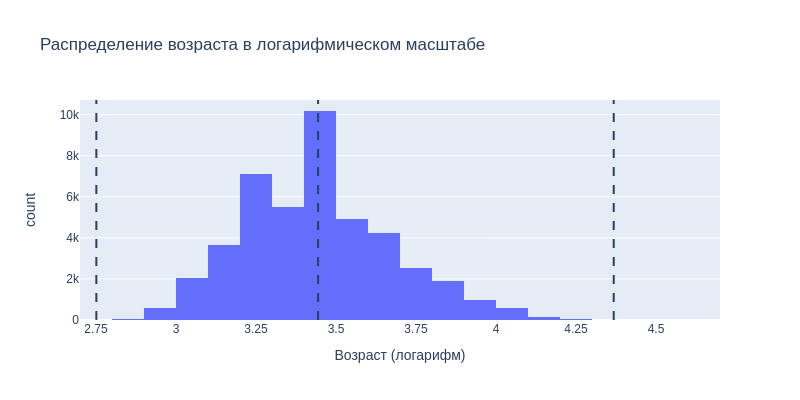

In [27]:
log_age = np.log(hh_data['Возраст'])
fig = px.histogram(
    log_age,
    nbins=30,
    width=800,
    height=400,
    title='Распределение возраста в логарифмическом масштабе'
).update_layout(xaxis = dict(dtick=0.25), showlegend=False, xaxis_title='Возраст (логарифм)')
fig.add_vline(log_age.mean(), line_dash='dash')
fig.add_vline(log_age.mean() + 4 * log_age.std(), line_dash='dash')
fig.add_vline(log_age.mean() - 3 * log_age.std(), line_dash='dash')
fig.show('png')

На графике заметна правосторонняя асимметрия. А также присутствует 3 выброса

#### 5.1 Очистка аномальных значений

In [28]:
def outliers_z(data, feature):
    x = np.log(data[feature])
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return cleaned, outliers

cleaned, outliers = outliers_z(hh_data, 'Возраст')
hh_data = cleaned
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,сменный график,гибкий график,удаленная работа,вахтовый метод,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,True,True,False,False,True,False,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,Другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,False,True,True,False,True,True,True,False,True,60000.0


Соискатели с возрастом 15 и 100 лет попадают под категорию выбросов